# FB - Feature bagging detector
### A feature bagging detector is a meta estimator that fits a number of base detectors on various sub-samples of the dataset and use averaging or other combination methods to improve the predictive accuracy and control over-fitting.

### The sub-sample size is always the same as the original input sample size but the features are randomly sampled from half of the features to all features.

### By default, LOF is used as the base estimator. However, any estimator could be used as the base estimator, such as kNN and ABOD.

### Feature bagging first construct n subsamples by random selecting a subset of features, which induces the diversity of base estimators.

### Finally, the prediction score is generated by averaging/taking the maximum of all base detectors. 
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.feature_bagging

### Arguments that work with FeatureBagging algorithm:
1. base_estimator
2. n_estimators
3. contamination
4. max_features
5. bootstrap_features
6. check_detector
7. check_estimator
8. n_jobs
9. random_state
10. combination
11. verbose
12. estimator_params

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=6, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took    42.281663 seconds
image downsampling       ...took     3.082572 seconds
image downsampling       ...took     3.551213 seconds
image downsampling       ...took     4.609510 seconds
image downsampling       ...took     5.662502 seconds
image downsampling       ...took     6.132283 seconds
image downsampling       ...took     6.601324 seconds
image downsampling       ...took     7.659304 seconds
image downsampling       ...took     8.719094 seconds
image downsampling       ...took     9.773700 seconds
image downsampling       ...took    10.244030 seconds
image downsampling       ...took    10.714001 seconds
image downsampling       ...took    11.769789 seconds
image downsampling       ...took    12.243351 seconds
image downsampling       ...took    13.299517 seconds
image downsampling       ...took    14.355546 seconds
image downsampling       ...took    14.828557 seconds
image downsampling       ...took    15.301061 seconds
image downsampling       ...

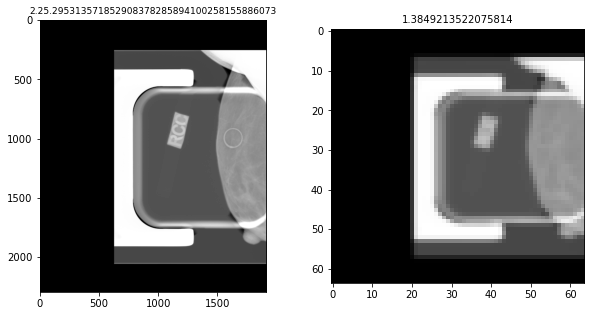

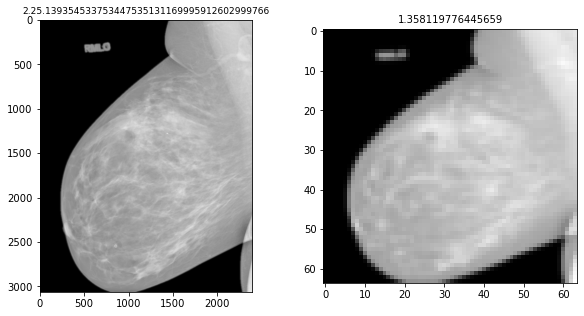

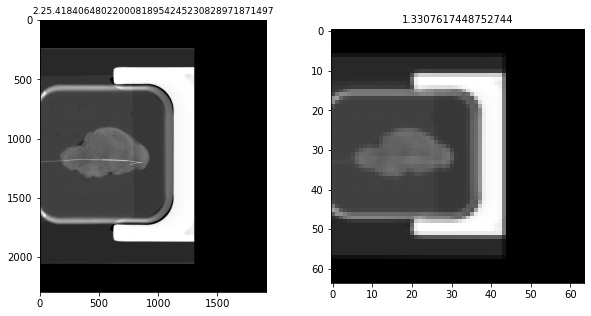

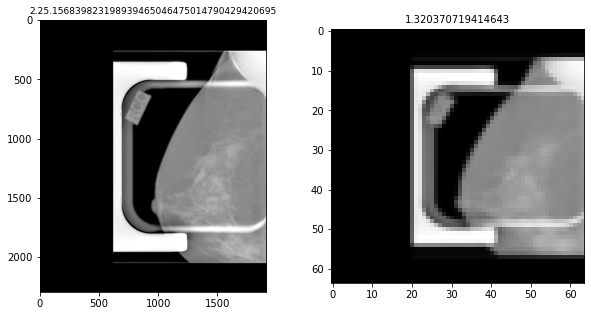

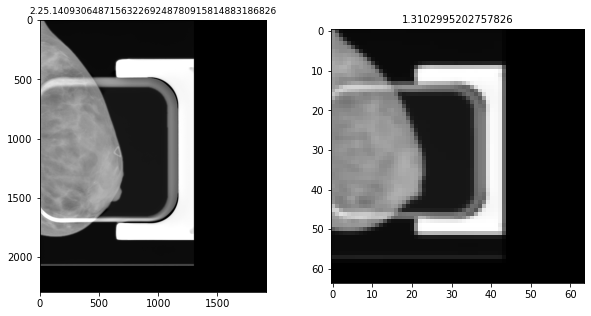

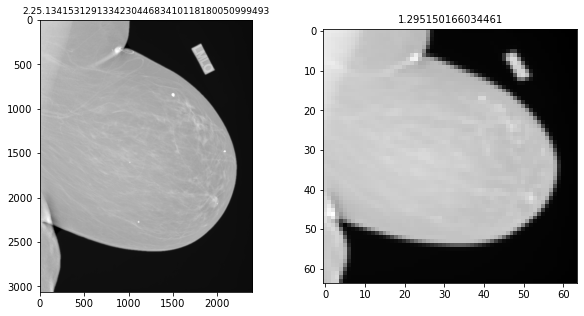

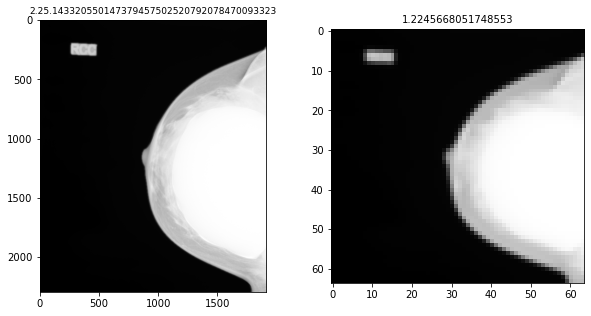

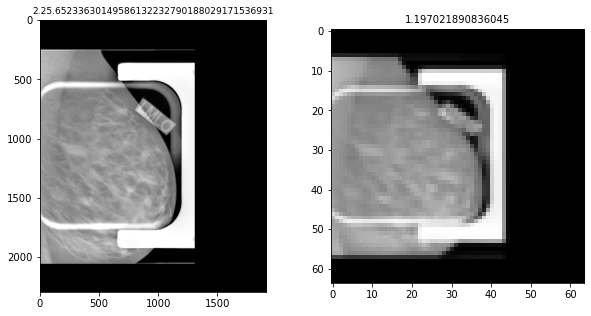

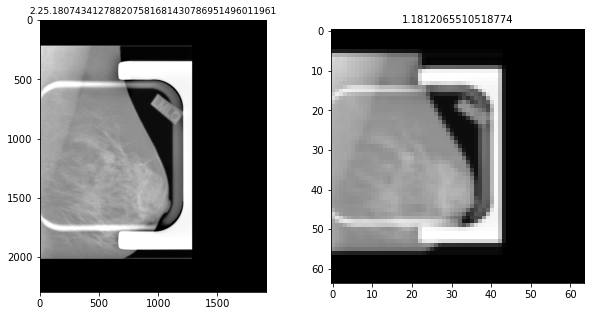

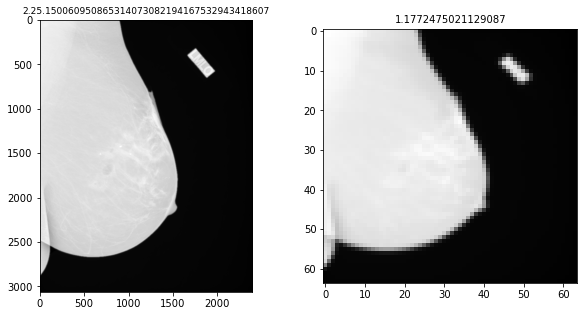

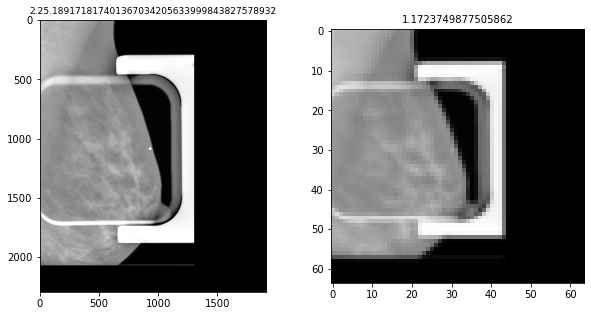

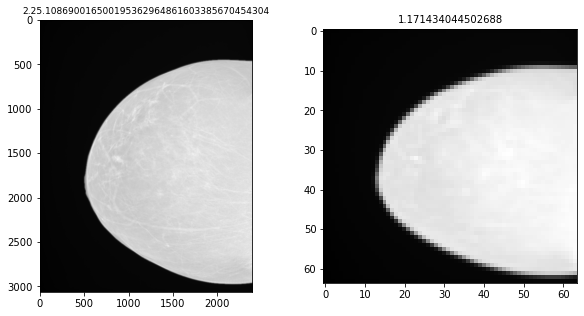

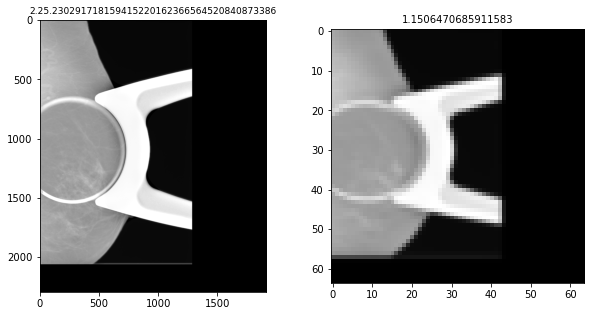

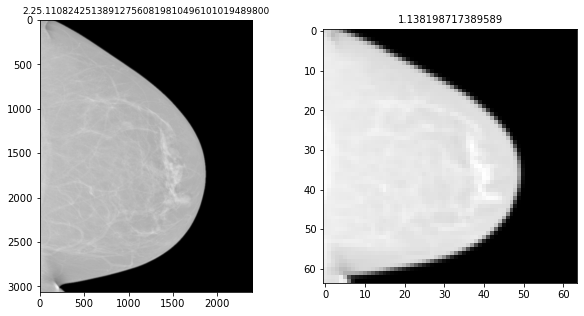

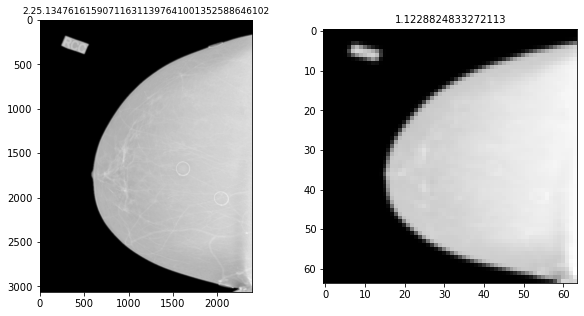

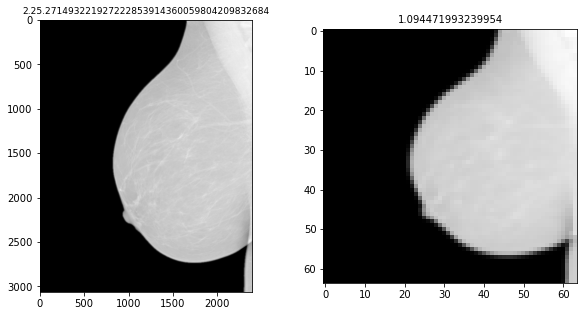

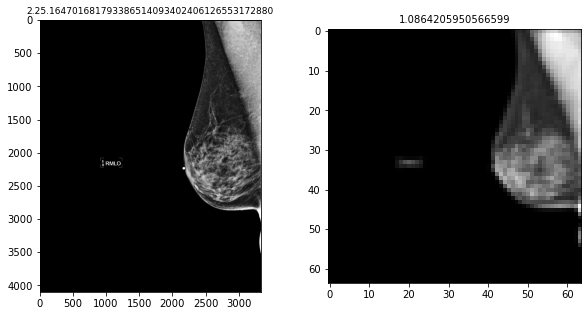

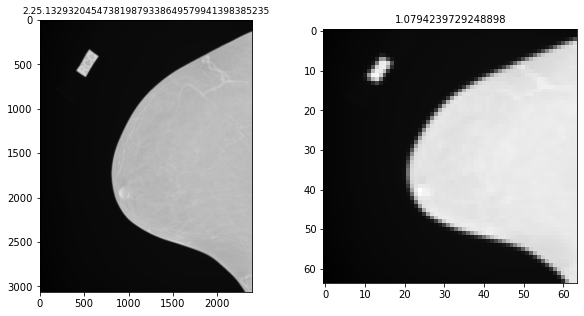

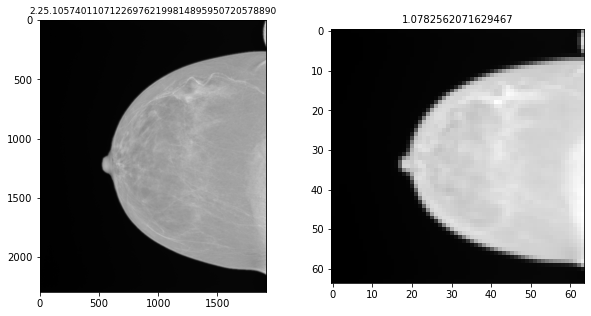

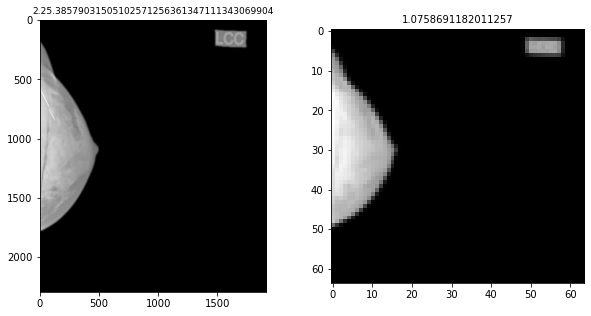

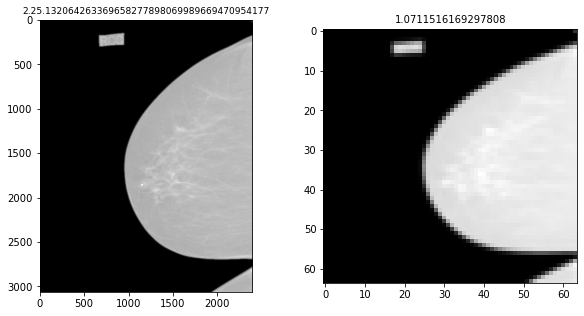

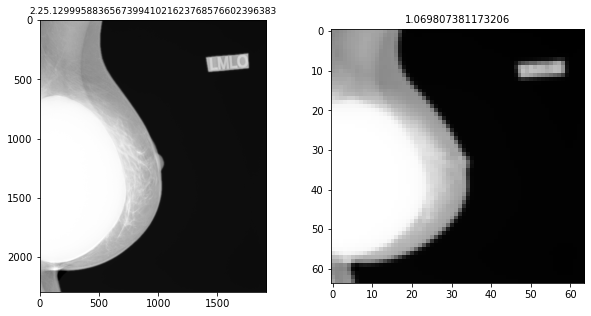

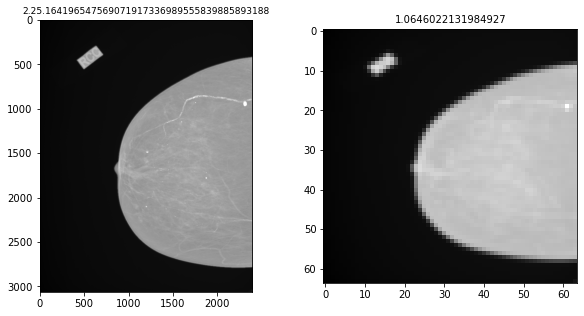

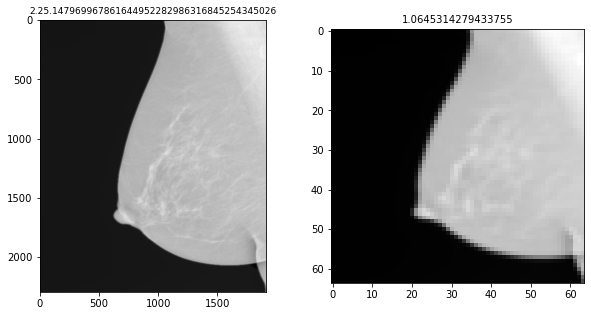

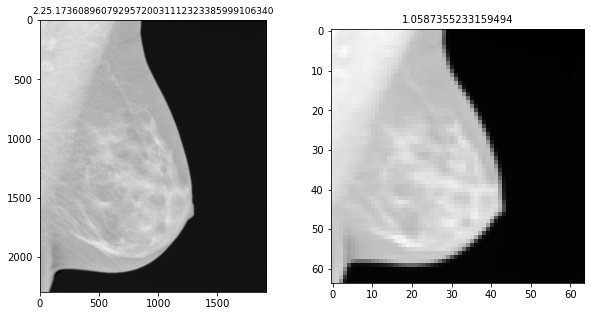

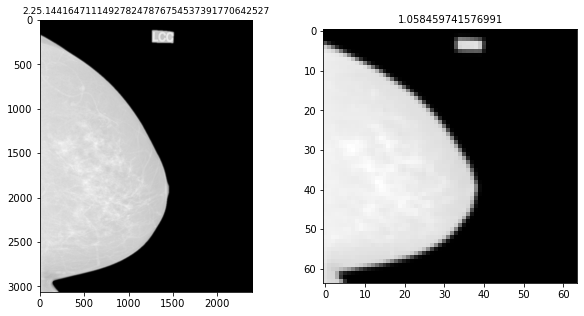

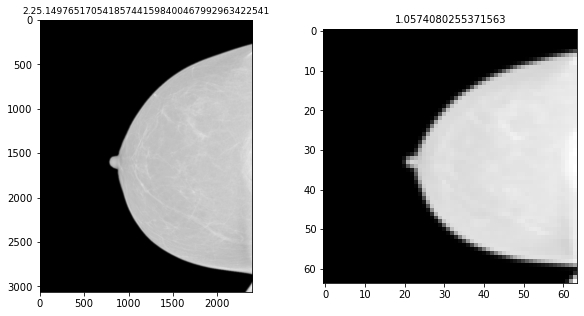

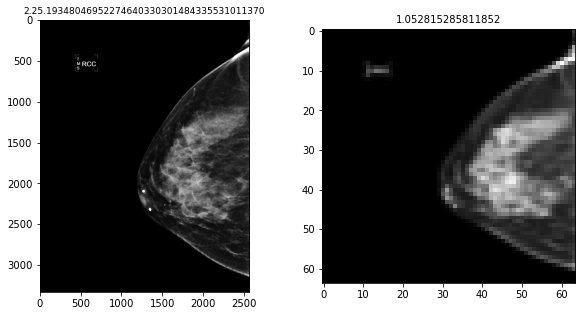

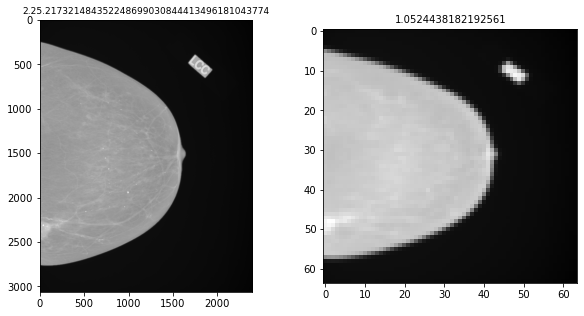

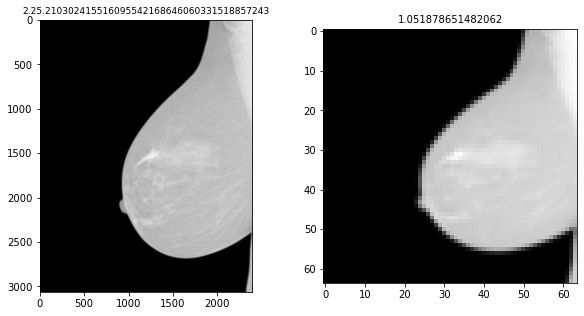

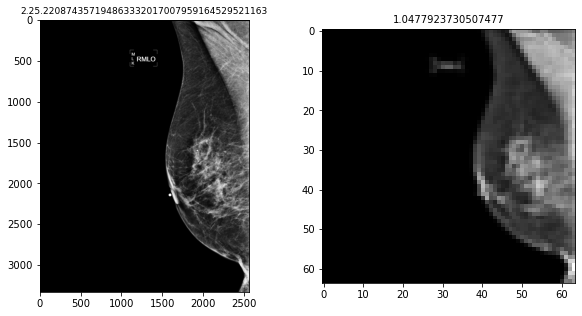

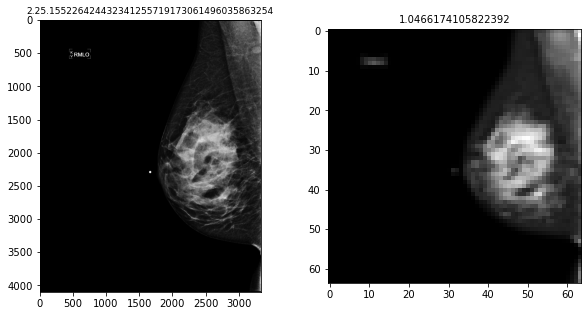

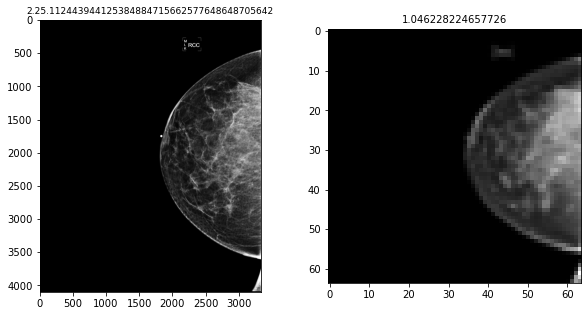

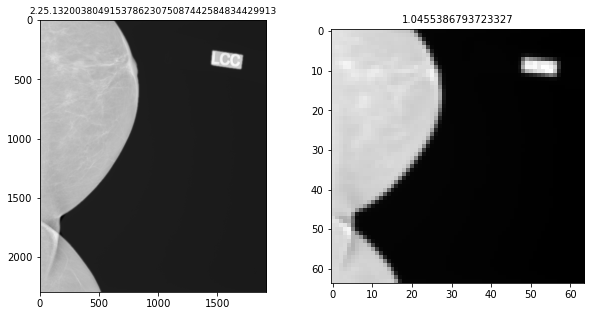

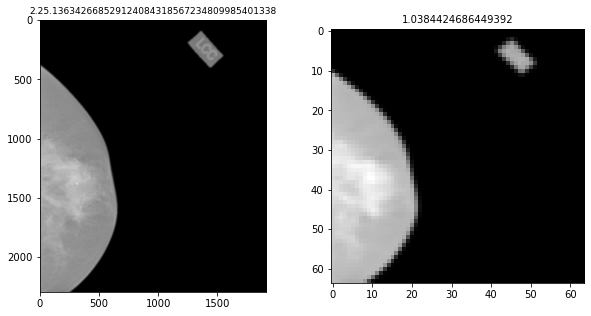

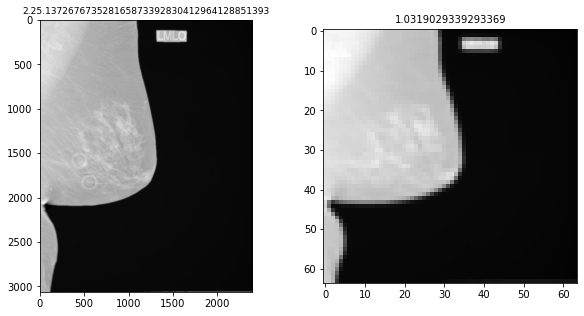

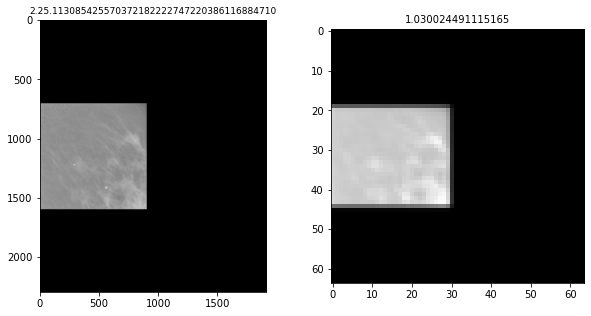

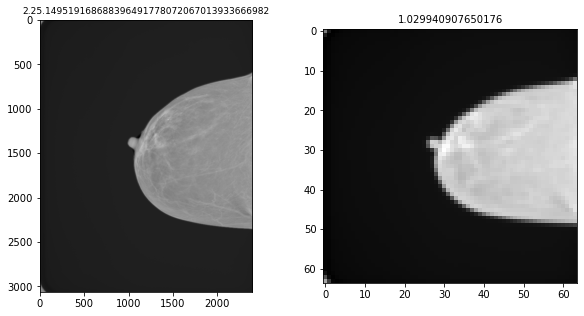

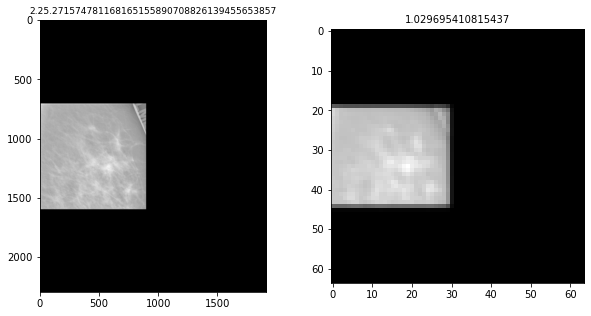

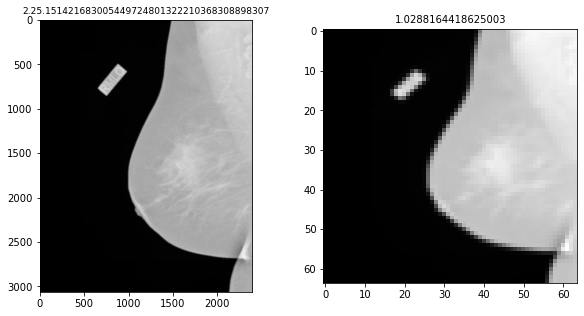

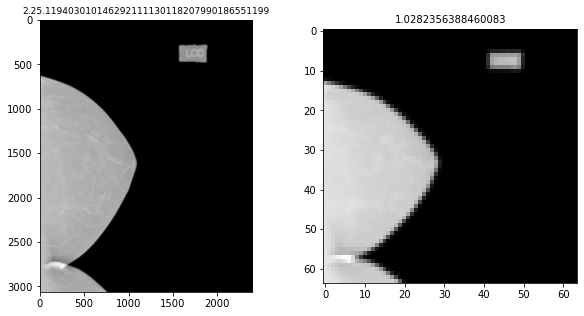

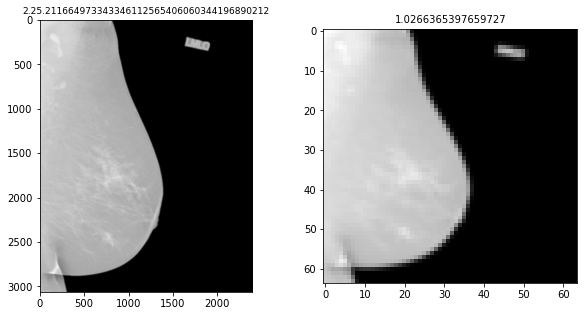

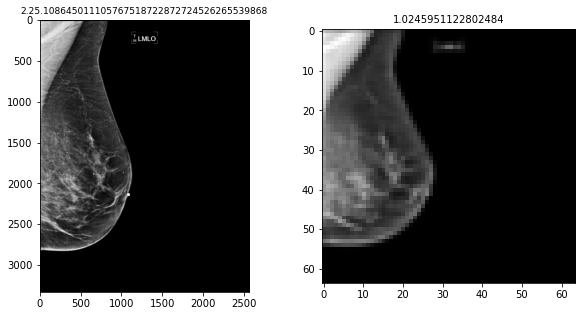

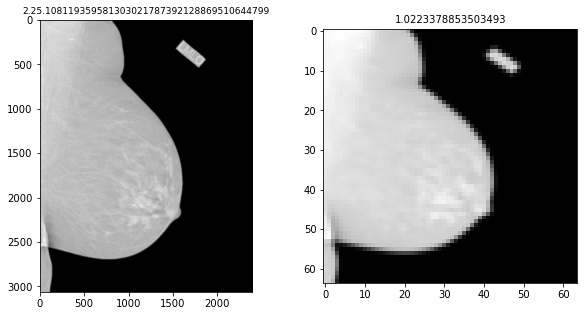

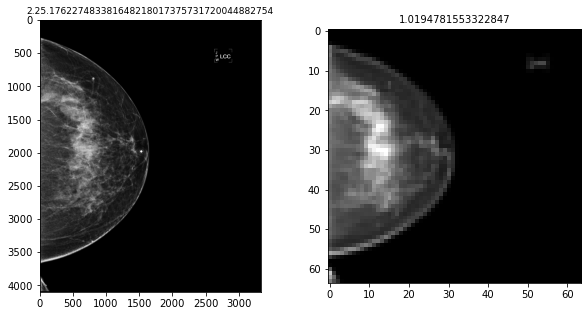

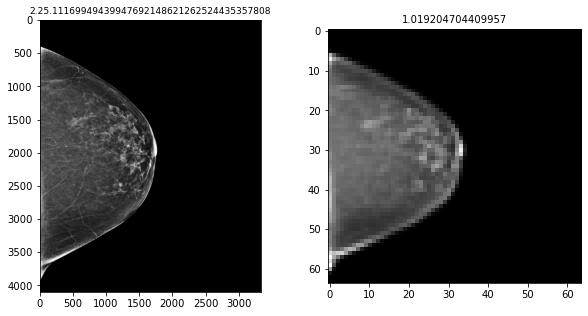

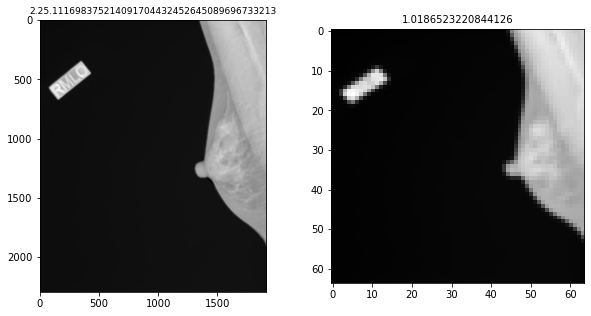

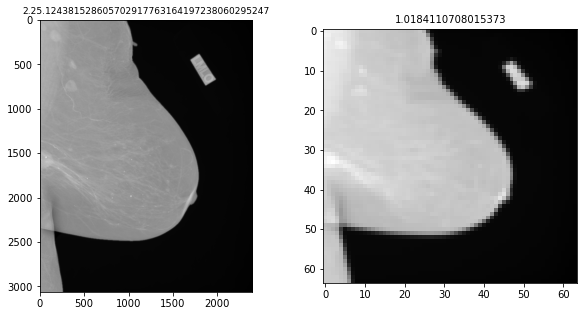

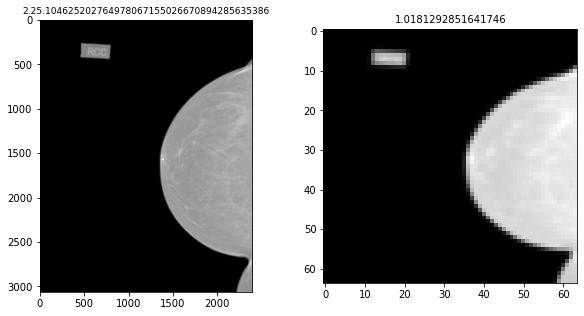

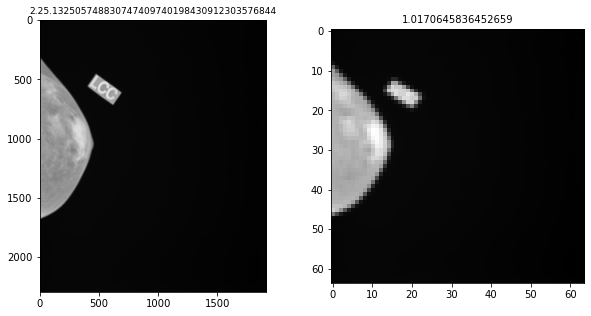

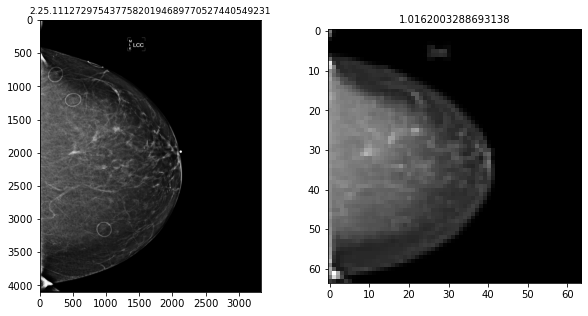

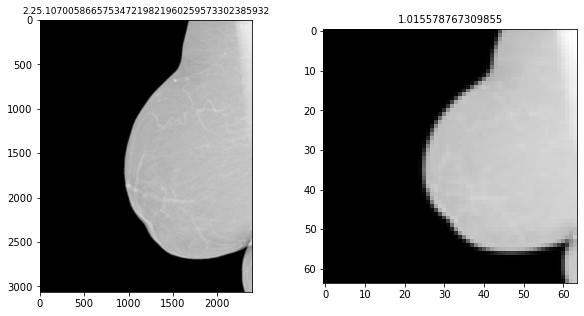

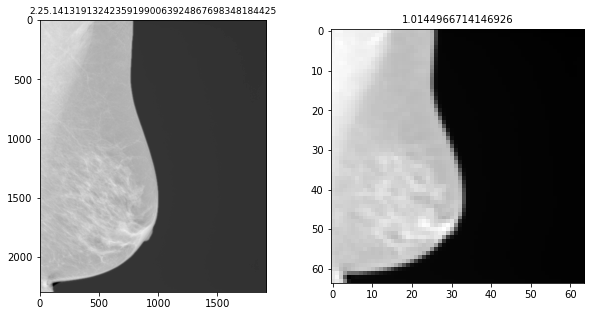

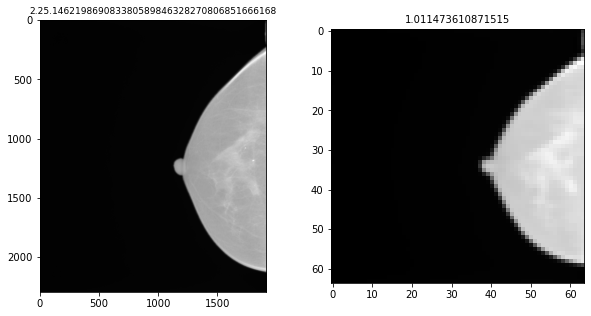

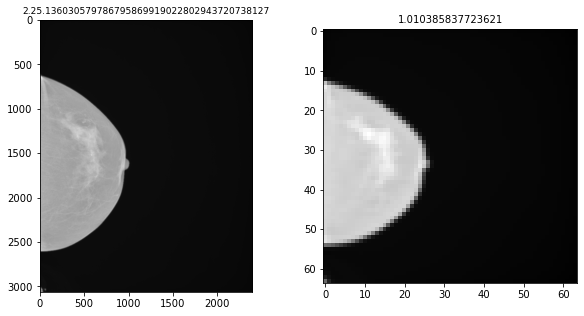

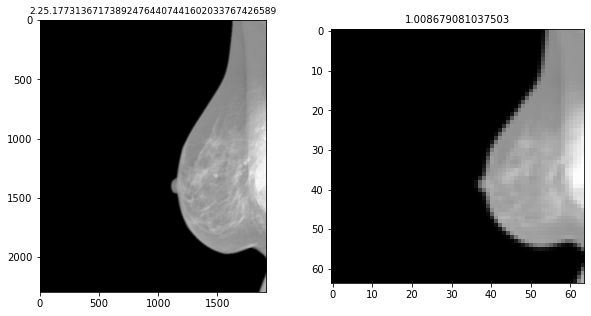

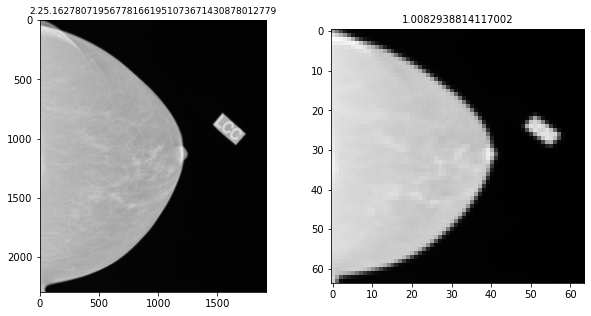

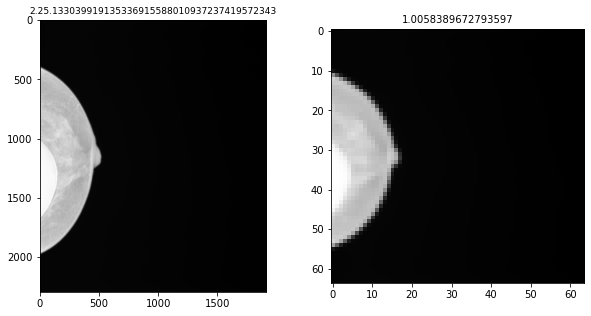

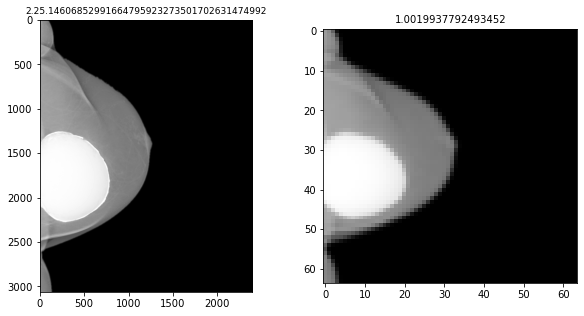

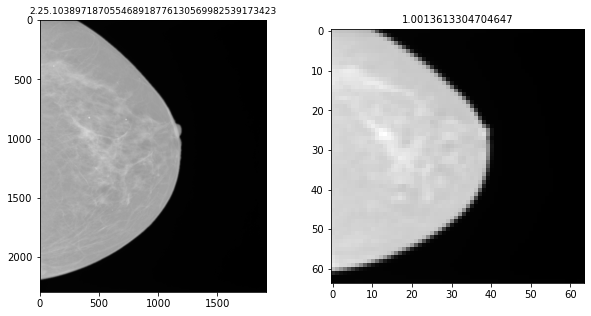

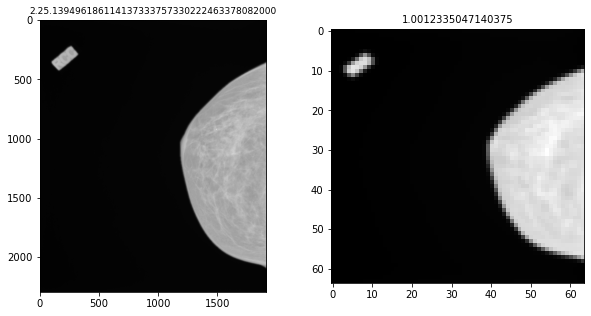

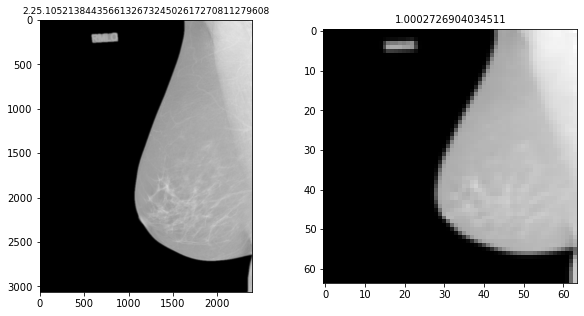

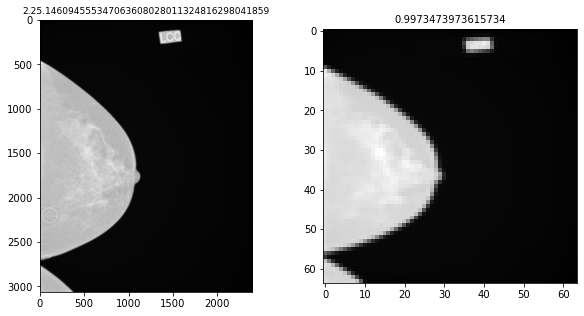

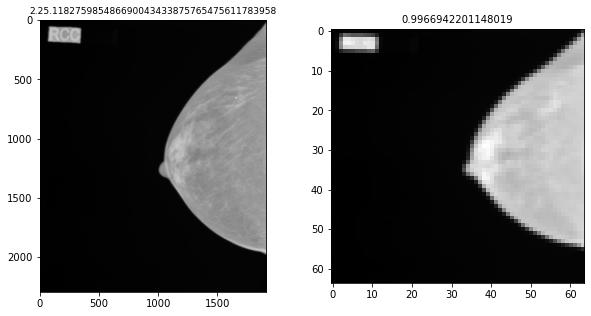

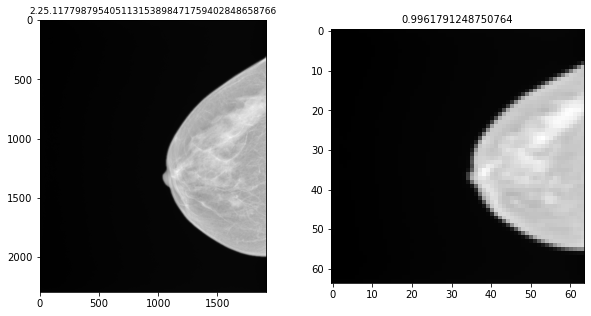

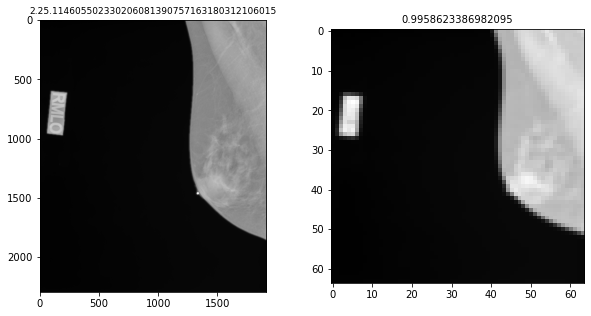

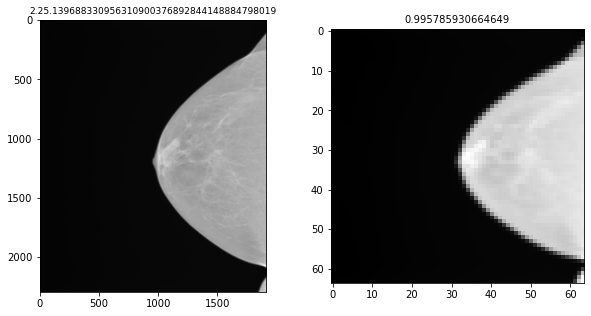

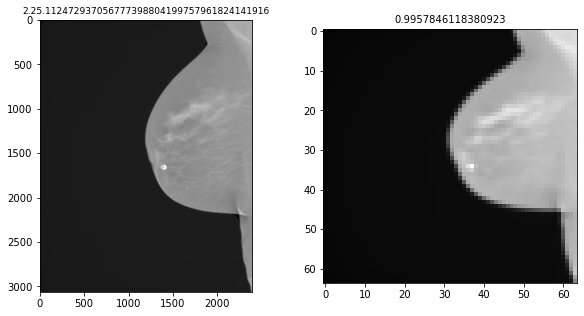

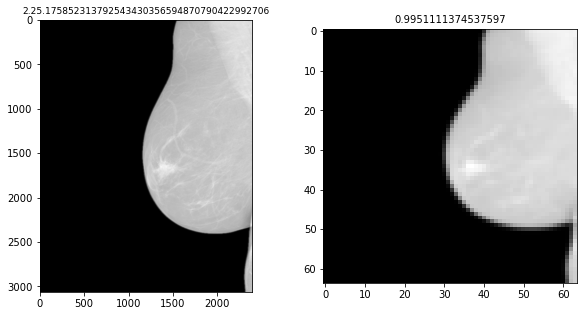

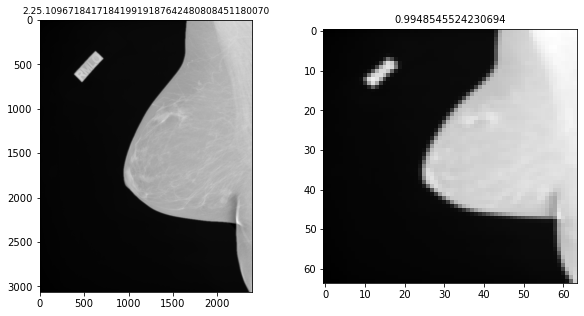

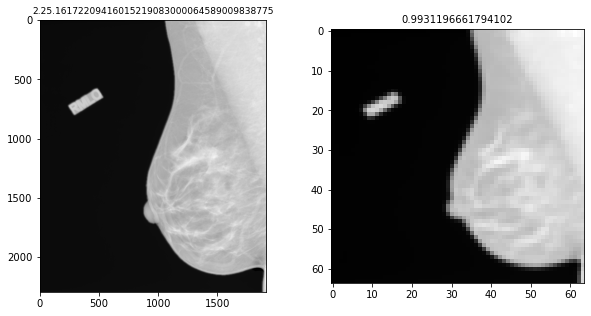

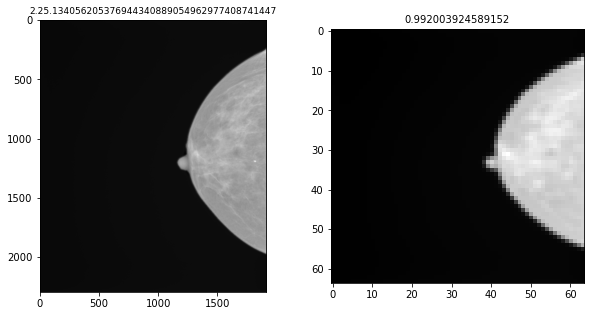

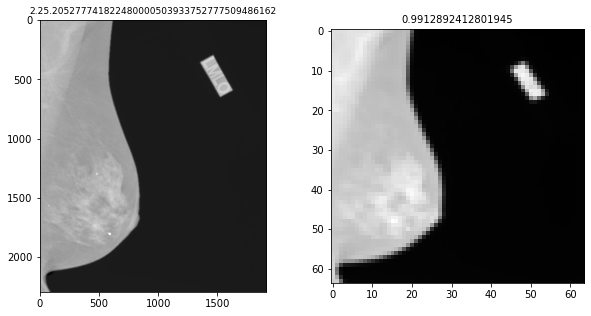

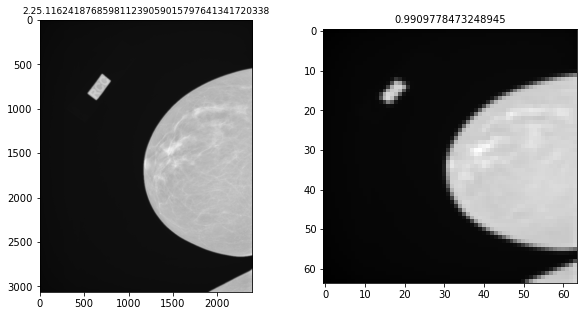

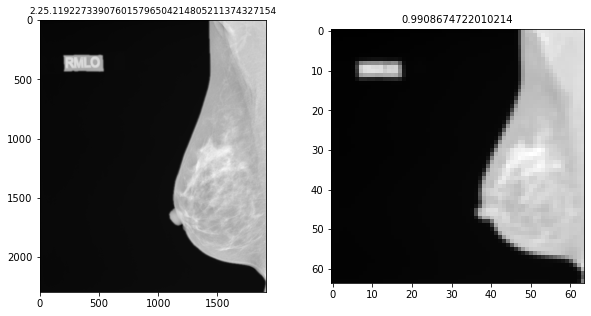

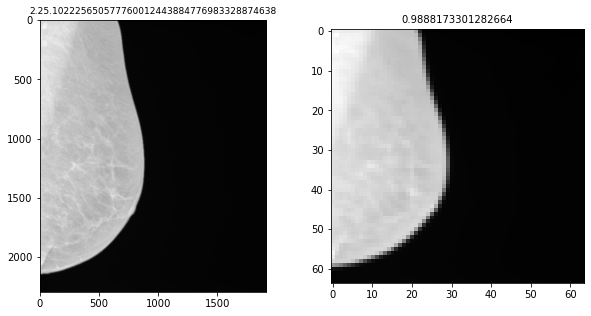

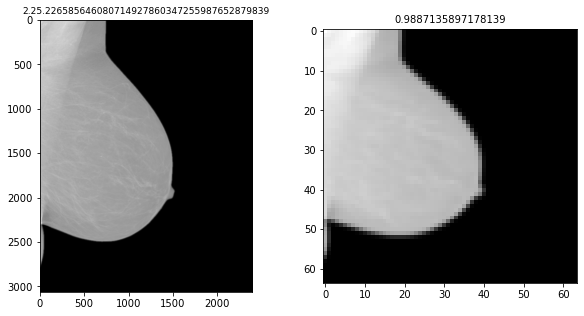

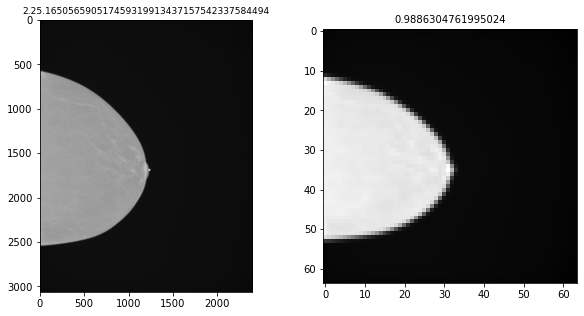

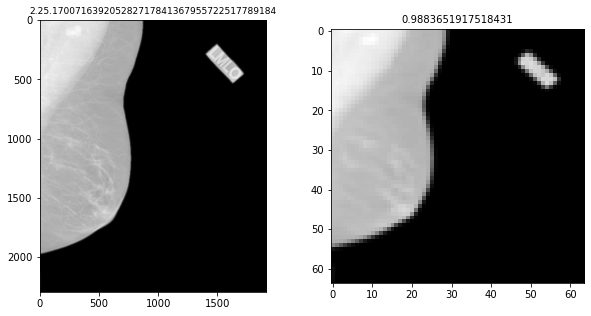

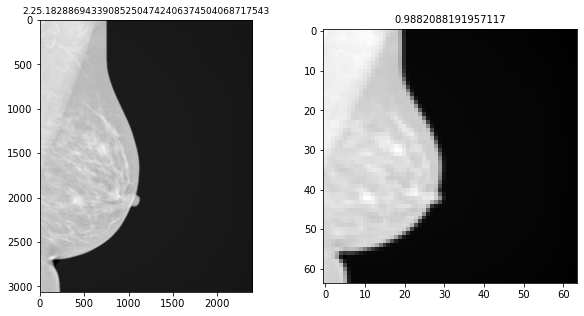

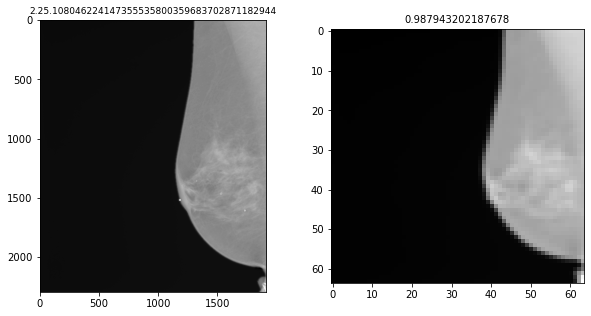

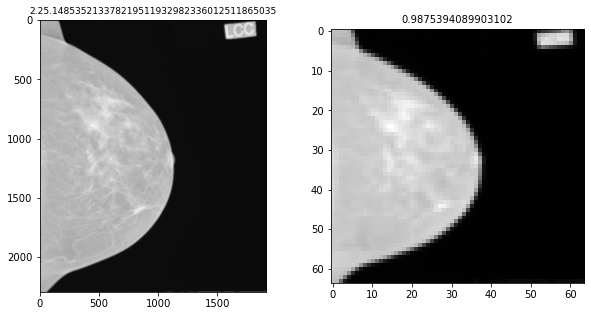

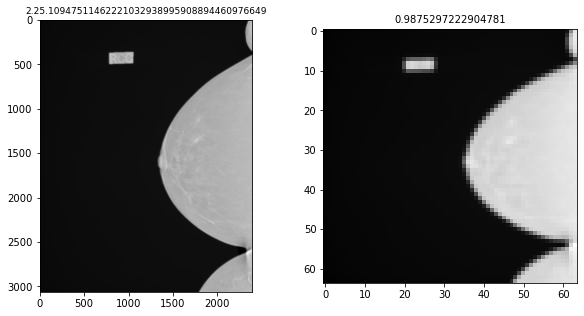

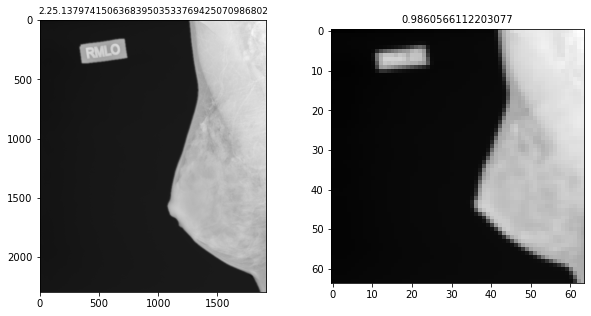

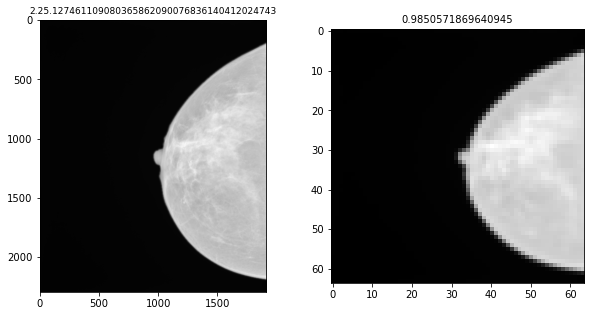

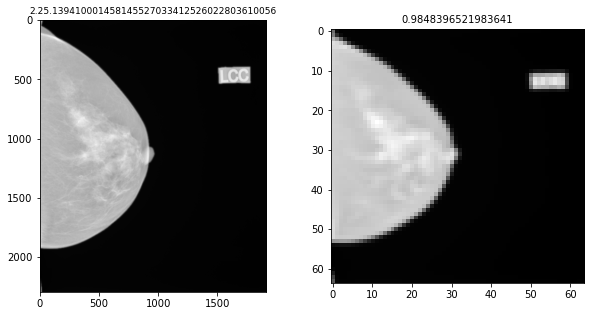

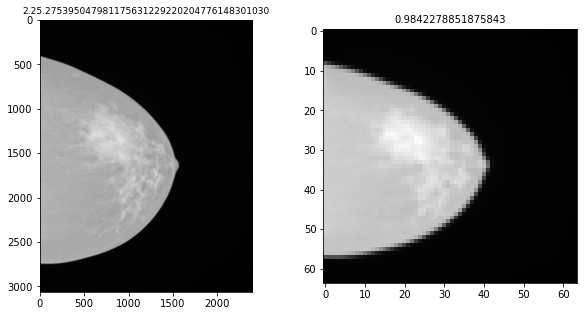

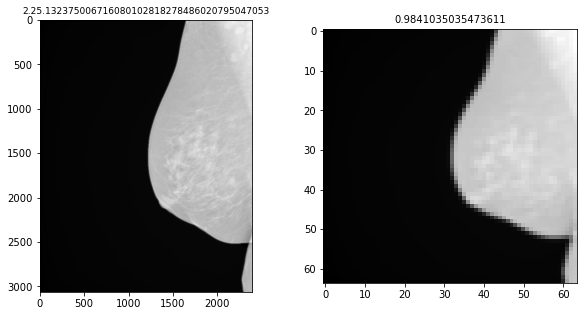

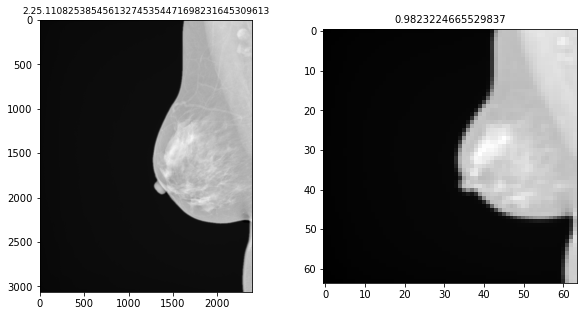

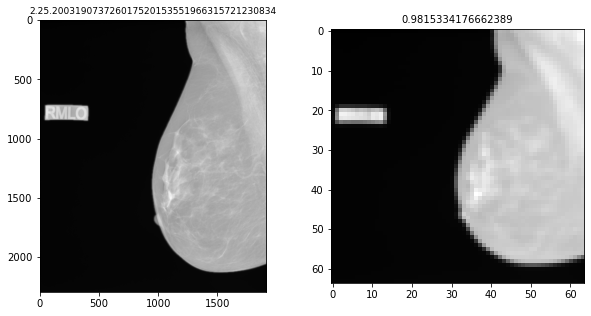

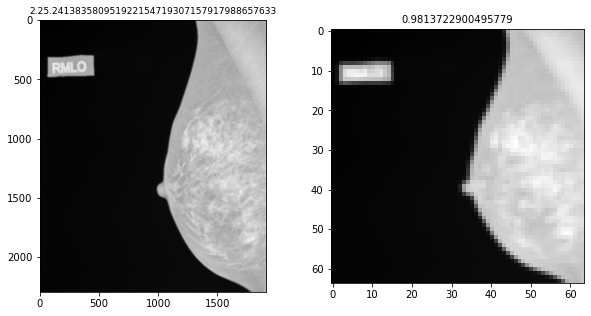

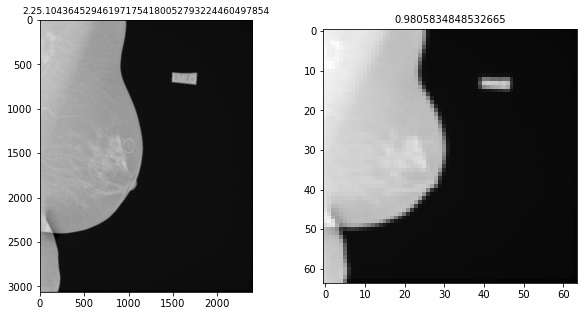

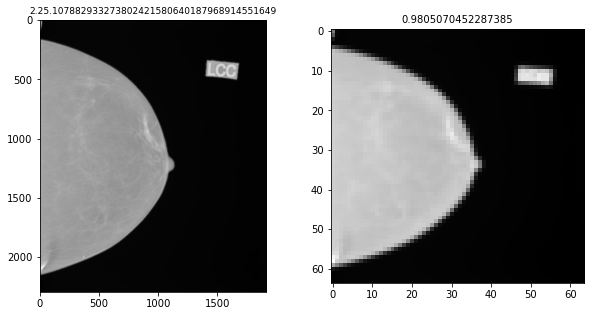

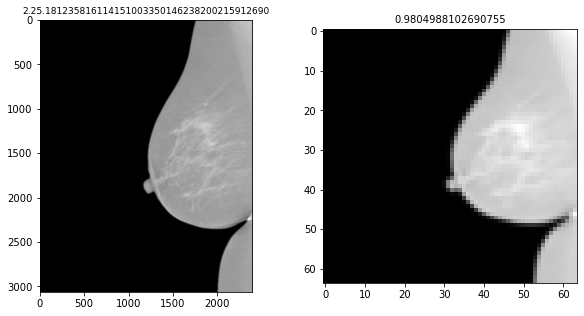

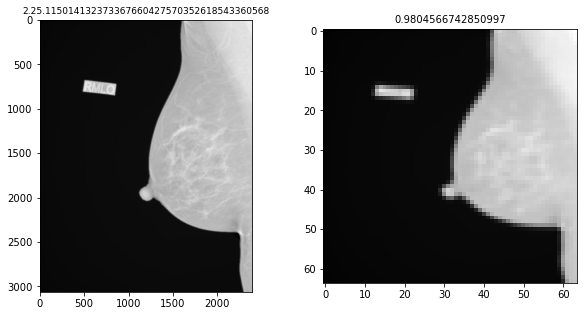

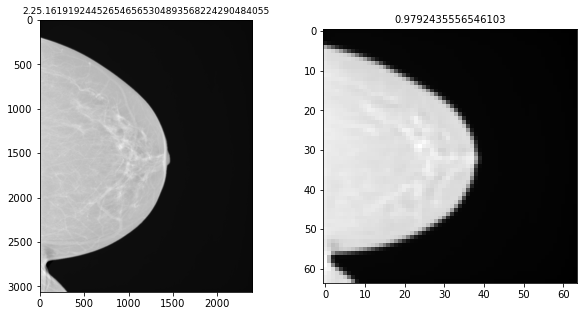

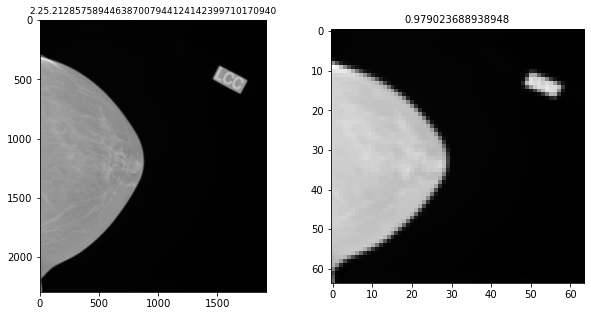

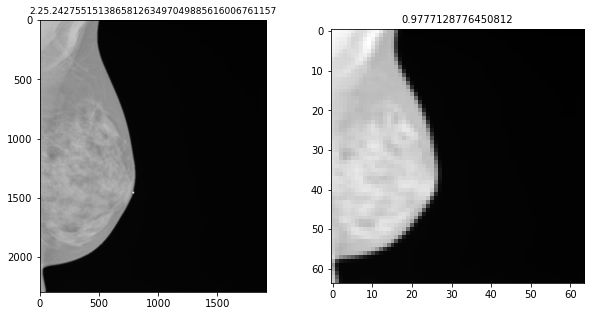

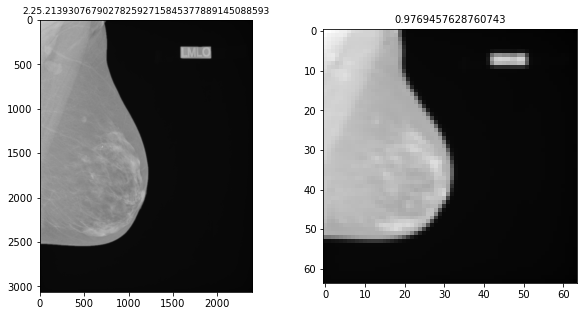

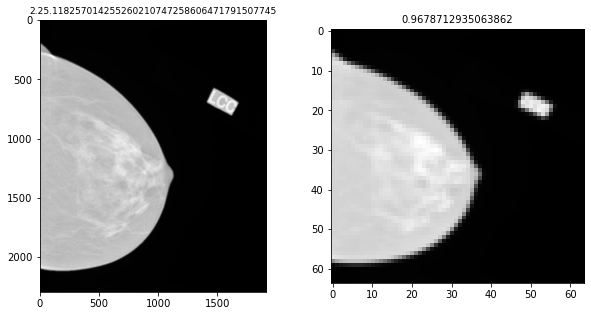

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='FB')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])